In [1]:
# import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pcf_gen = pd.read_csv("./Data/pcf-general.csv")
spl_gen_1 = pd.read_csv("./Data/spl-gen-1.csv")
spl_gen_2 = pd.read_csv("./Data/spl-gen-2.csv")
spl_gen = pd.concat([spl_gen_1, spl_gen_2], axis=0, ignore_index=True)

In [3]:
authorID = list(set(pcf_gen['AuthorID']).intersection(set(spl_gen['AuthorID'])))

In [4]:
# this is our training set, AuthorID is the label and Content is the feature
pcf_gen_common = pcf_gen[pcf_gen['AuthorID'].isin(authorID)]
pcf_gen_common = pcf_gen_common.drop(['Reactions', 'Attachments'], axis=1)

In [8]:
# create new txt file with content of each author
for i in authorID:
    with open('./Data/pcf_gen_common/'+str(i)+'.txt', 'w') as f:
        message = pcf_gen_common[pcf_gen_common['AuthorID'] == i]['Content'].str.cat(sep=' ')
        # check if message has any character that cannot be encoded
        # if yes, remove that character
        # if no, write the message to the file

        try:
            f.write(message)
        except UnicodeEncodeError:
            message = message.encode('ascii', 'ignore').decode('ascii')
            f.write(message)
    f.close()


In [13]:
# create new txt file with content of each author
for i in authorID:
    with open('./Data/spl_gen/'+str(i)+'.txt', 'w') as f:
        message = spl_gen[spl_gen['AuthorID'] == i]['Content'].str.cat(sep=' ')
        # check if message has any character that cannot be encoded
        # if yes, remove that character
        # if no, write the message to the file

        try:
            f.write(message)
        except UnicodeEncodeError:
            message = message.encode('ascii', 'ignore').decode('ascii')
            f.write(message)
    f.close()

In [14]:
# Train data: pcf_gen_common
# Test data: spl_gen

# import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [15]:
# read the training data

# create a list of all the files in the folder
files = os.listdir('./Data/pcf_gen_common/')
# create a list of all the file names
file_names = [file.split('.')[0] for file in files]
# create a list of all the file paths
file_paths = ['./Data/pcf_gen_common/'+file for file in files]

# create a dataframe with file names and file paths
df = pd.DataFrame({'AuthorID': file_names, 'File_Path': file_paths})

# read the content of each file and store it in a list
content = []
for file in file_paths:
    with open(file, 'r') as f:
        content.append(f.read())
    f.close()

# add the content to the dataframe
df['Content'] = content


In [16]:
# read the test data

# create a list of all the files in the folder
files = os.listdir('./Data/spl_gen/')
# create a list of all the file names
file_names = [file.split('.')[0] for file in files]
# create a list of all the file paths
file_paths = ['./Data/spl_gen/'+file for file in files]

# create a dataframe with file names and file paths
df_test = pd.DataFrame({'AuthorID': file_names, 'File_Path': file_paths})

# read the content of each file and store it in a list
content = []
for file in file_paths:
    with open(file, 'r') as f:
        content.append(f.read())
    f.close()

# add the content to the dataframe
df_test['Content'] = content



In [22]:
# Feature set: Letters, numbers, special characters, punctuations
# Label set: AuthorID
# Model: Naive Bayes

# create the feature set consisting of letters, numbers, special characters, punctuations
def create_feature_set(df):
    feature_set = []
    for i in range(len(df)):
        # remove all the special characters
        text = re.sub('[^a-zA-Z0-9]', ' ', df['Content'][i])
        # convert all the characters to lower case
        text = text.lower()
        # remove all the stop words
        text = [word for word in text.split() if word not in set(stopwords.words('english'))]
        # stem the words
        ps = PorterStemmer()
        text = [ps.stem(word) for word in text]
        # join the words
        text = ' '.join(text)
        feature_set.append(text)
    return feature_set

# create the feature set for the training data
feature_set = create_feature_set(df)
# create the feature set for the test data
feature_set_test = create_feature_set(df_test)

# create the label set
label_set = df['AuthorID']

# create the vectorizer
vectorizer = CountVectorizer()
# fit the vectorizer to the training data
vectorizer.fit(feature_set)
# transform the training data
X = vectorizer.transform(feature_set)
# transform the test data
X_test = vectorizer.transform(feature_set_test)

Accuracy:  5.970149253731343 %


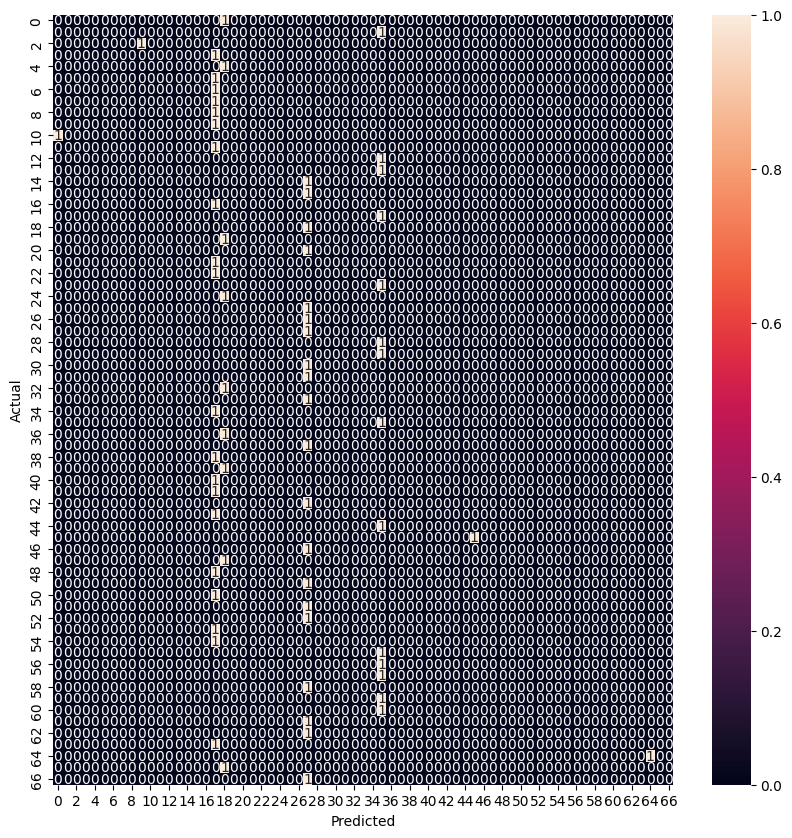

In [25]:
y = label_set
y_test = df_test['AuthorID']

# create the model
model = MultinomialNB()
# fit the model to the training data
model.fit(X, y)
# predict the labels for the test data
y_pred = model.predict(X_test)

# evaluate the model using accuracy percentage
print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
